In [99]:
import pandas as pd
import numpy as np

In [100]:
df=pd.read_csv('car data.csv')

In [101]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [102]:
df['Car_Name'].value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda CB Trigger,1
Yamaha FZ S,1
Bajaj Pulsar 135 LS,1


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [104]:
df['price_quantile_rank'] = pd.qcut(df['Selling_Price'], q=6, labels=[1, 2, 3, 4,5,6])

print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner price_quantile_rank  
0         Dealer       Manual      0                

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='price_quantile_rank', ylabel='Selling_Price'>

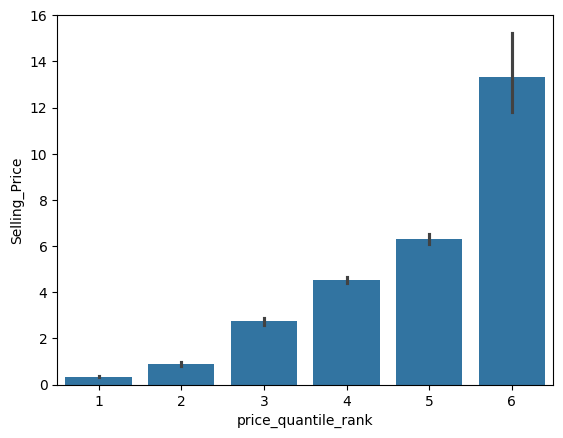

In [106]:
sns.barplot(df,y='Selling_Price',x='price_quantile_rank' )

In [107]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for col in ['Transmission', 'Selling_type', 'Fuel_Type']:
    df[col] = lb.fit_transform(df[col])

In [113]:
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(df)
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df.iloc[:,2:])
sdf = pd.DataFrame(scaled_data, columns=df.columns[2:])

In [114]:
sdf.head()

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,price_quantile_rank
0,-0.258416,-0.236256,-0.256224,0.500183,-0.737285,0.39148,-0.174501,-0.282194
1,0.017481,0.221544,0.155911,-1.852241,-0.737285,0.39148,-0.174501,0.303602
2,0.510154,0.257472,-0.773969,0.500183,-0.737285,0.39148,-0.174501,0.889398
3,-0.356950,-0.403151,-0.817758,0.500183,-0.737285,0.39148,-0.174501,-0.282194
4,-0.012079,-0.087906,0.141743,-1.852241,-0.737285,0.39148,-0.174501,0.303602


In [118]:
x=sdf.iloc[:,1:]
y=sdf.iloc[:,0]

,Selling_Price
0,-0.258416
1,0.017481
2,0.510154
3,-0.356950
4,-0.012079


In [119]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)

In [121]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_tr,y_tr)
y_pred=lr.predict(x_ts)

In [124]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print(mean_absolute_error(y_ts,y_pred))
print(mean_squared_error(y_ts,y_pred))
print(r2_score(y_ts,y_pred))

0.16936539032300985
0.05852145854799377
0.9074728124967876


Using RF

In [131]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_tr,y_tr)
y_pred1=rf.predict(x_ts)

In [132]:
print(mean_absolute_error(y_ts,y_pred1))
print(mean_squared_error(y_ts,y_pred1))
print(r2_score(y_ts,y_pred1))

0.08847241160073724
0.022374760302038898
0.9646236834629072
